# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "C:\DataVisualization\Homework\weatherpy\cities"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL api call
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="

# Dataframe made for the for loop
weatherDF = pd.DataFrame()
weatherDF["City"] = ""
weatherDF["Cloudiness"] = ""
weatherDF["Country"] = ""
weatherDF["Date"] = "" 
weatherDF["Humidity"] = ""
weatherDF["Lat"] = ""
weatherDF["Lng"] = ""
weatherDF["Max Temp"] = ""
weatherDF["Wind Speed"] = ""

# # Print to log
print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through all of the cities
for x in np.arange(len(cities)):

    # Print current record & city
    print(f"Processing record {x} | {cities[x]}")
    
    # Try these things
    try:
        
        # Run Weather from URL to collect info JSON
        currentWeather = requests.get(f"{base_url}{api_key}&q={cities[x]}&units=imperial").json()
        
        # parse out all the variable
        weatherDF.loc[x, "City"] = currentWeather["name"]
        weatherDF.loc[x, "Cloudiness"] = currentWeather["clouds"]["all"]            
        weatherDF.loc[x, "Country"] = currentWeather["sys"]["country"]
        weatherDF.loc[x, "Date"] = currentWeather["dt"]
        weatherDF.loc[x, "Humidity"] = currentWeather["main"]["humidity"]
        weatherDF.loc[x, "Lat"] = currentWeather["coord"]["lat"]
        weatherDF.loc[x, "Lng"] = currentWeather["coord"]["lon"]
        weatherDF.loc[x, "Max Temp"] = currentWeather["main"]["temp_max"]
        weatherDF.loc[x, "Wind Speed"] = currentWeather["wind"]["speed"]
    
    # If previous block did not work display error message
    except (KeyError, IndexError):
        print("City not found. Skipping...")

# Print end of data retrieval process message
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

#Drop
weatherpy= weatherDF.dropna()



Beginning Data Retrieval
-------------------------------
Processing record 0 | tibati
Processing record 1 | kongoussi
Processing record 2 | puerto ayora
Processing record 3 | katsuura
Processing record 4 | hermanus
Processing record 5 | bluff
Processing record 6 | dikson
Processing record 7 | punta arenas
Processing record 8 | saldanha
Processing record 9 | dehloran
Processing record 10 | hithadhoo
Processing record 11 | mount gambier
Processing record 12 | leningradskiy
Processing record 13 | sitka
Processing record 14 | upernavik
Processing record 15 | ushuaia
Processing record 16 | aksarka
Processing record 17 | saskylakh
Processing record 18 | norman wells
Processing record 19 | honiara
Processing record 20 | mahebourg
Processing record 21 | mataura
Processing record 22 | cape town
Processing record 23 | prince rupert
Processing record 24 | bethel
Processing record 25 | birao
Processing record 26 | busselton
Processing record 27 | taolanaro
City not found. Skipping...
Processing re

Processing record 226 | torbay
Processing record 227 | codrington
Processing record 228 | mys shmidta
City not found. Skipping...
Processing record 229 | victoria point
Processing record 230 | kerema
Processing record 231 | tuktoyaktuk
Processing record 232 | karlivka
Processing record 233 | mongo
Processing record 234 | touros
Processing record 235 | zhigansk
Processing record 236 | saint-pierre
Processing record 237 | east london
Processing record 238 | suba
Processing record 239 | tomatlan
Processing record 240 | florence
Processing record 241 | maragogi
Processing record 242 | viedma
Processing record 243 | pau dos ferros
Processing record 244 | tsihombe
City not found. Skipping...
Processing record 245 | westport
Processing record 246 | bilibino
Processing record 247 | nikolskoye
Processing record 248 | bow island
Processing record 249 | bogorodskoye
Processing record 250 | sidhi
Processing record 251 | kavieng
Processing record 252 | eureka
Processing record 253 | vostok
Processi

Processing record 449 | stoyba
City not found. Skipping...
Processing record 450 | poyarkovo
Processing record 451 | coihaique
Processing record 452 | bondoukou
Processing record 453 | cabedelo
Processing record 454 | cheney
Processing record 455 | hobyo
Processing record 456 | marawi
Processing record 457 | wairoa
Processing record 458 | altay
Processing record 459 | nhulunbuy
Processing record 460 | husavik
Processing record 461 | praia da vitoria
Processing record 462 | cheuskiny
City not found. Skipping...
Processing record 463 | kavaratti
Processing record 464 | ambilobe
Processing record 465 | pinega
Processing record 466 | riyadh
Processing record 467 | katangli
Processing record 468 | mersing
Processing record 469 | achutupo
City not found. Skipping...
Processing record 470 | lesosibirsk
Processing record 471 | gatton
Processing record 472 | udachnyy
Processing record 473 | margate
Processing record 474 | petrozavodsk
Processing record 475 | te anau
Processing record 476 | trur

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# export csv path
weatherpy.to_csv(output_data_file)


In [5]:
# Record count
weatherpy.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [6]:
# dataframe display
weatherpy.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tibati,86,CM,1571005847,95,6.47,12.63,66.4,3.06
1,Kongoussi,0,BF,1571005847,61,13.32,-1.53,81.81,9.89
2,Puerto Ayora,20,EC,1571005847,51,-0.74,-90.35,80.6,12.75
3,Katsuura,75,JP,1571005848,72,33.93,134.5,64.99,8.05
4,Hermanus,0,ZA,1571005848,85,-34.42,19.24,64.99,7


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

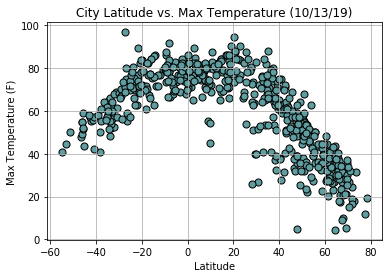

In [13]:
# Plot a scatter plot of latitude vs temperature with formatting
plt.scatter(weatherpy["Lat"], weatherpy["Max Temp"], color="cadetblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title(f"City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure to the output folder
plt.savefig("C:\DataVisualization\Homework\weatherpy\cities")

#### Latitude vs. Humidity Plot

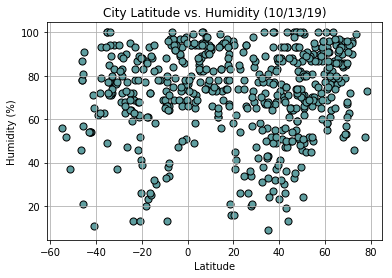

In [16]:
# Plot a scatter plot of latitude vs humidity with formatting
plt.scatter(weatherpy["Lat"], weatherpy["Humidity"],color="cadetblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig("C:\DataVisualization\Homework\weatherpy\cities")

#### Latitude vs. Cloudiness Plot

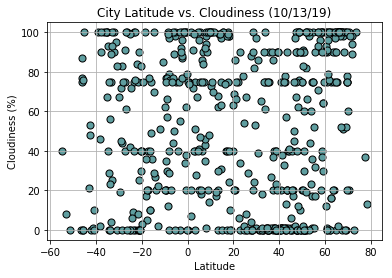

In [18]:


# Plot a scatter plot of latitude vs cloudiness with formatting
plt.scatter(weatherpy["Lat"], weatherpy["Cloudiness"],color="cadetblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig("C:\DataVisualization\Homework\weatherpy\cities")



#### Latitude vs. Wind Speed Plot

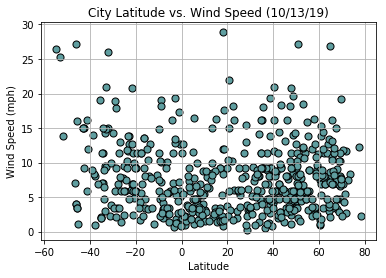

In [19]:
# Plot a scatter plot of latitude vs wind speed with formatting
plt.scatter(weatherpy["Lat"], weatherpy["Wind Speed"],color="cadetblue",
           edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure to the output folder
plt.savefig("C:\DataVisualization\Homework\weatherpy\cities")